# 회귀분석 과제
22 July 2021(Thu)

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 19기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

from google.colab import drive
drive.mount('/content/gdrive')

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [3]:
# train 데이터 불러오기
df = pd.read_csv("graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [4]:
# test data
test = pd.read_csv("graduate_test.csv")

# check size
print("data size", test.shape)

# test data look through
test.head(10)

# chance of admit를 예측하는 것이 과제

data size (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [5]:
## TODO 1
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치가 없습니다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [6]:
## TODO 2
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

In [7]:
df.Research.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df_dummy = pd.get_dummies(df)
df_dummy.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1,0
1,307,105,2,2.5,4.5,8.12,0.67,0,1
2,329,111,4,4.5,4.0,9.01,0.81,0,1
3,300,105,1,1.0,2.0,7.80,0.58,1,0
4,329,114,5,4.0,5.0,9.30,0.86,0,1
5,300,104,3,3.5,3.0,8.16,0.71,1,0
6,318,103,3,4.0,4.5,8.49,0.71,0,1
7,322,110,4,4.0,5.0,9.13,0.86,0,1
8,315,105,2,2.0,2.5,7.65,0.39,1,0
9,332,119,4,5.0,4.5,9.24,0.90,0,1


In [9]:
df = df_dummy
display(df.head())

test = pd.get_dummies(test)
display(test.head())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1,0
1,307,105,2,2.5,4.5,8.12,0.67,0,1
2,329,111,4,4.5,4.0,9.01,0.81,0,1
3,300,105,1,1.0,2.0,7.80,0.58,1,0
4,329,114,5,4.0,5.0,9.30,0.86,0,1


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes
0,304,103,5,5.0,4.0,8.64,1,0
1,297,96,2,2.5,1.5,7.89,1,0
2,302,101,2,2.5,3.5,7.96,1,0
3,318,112,3,4.0,3.5,8.67,1,0
4,304,100,4,1.5,2.5,7.84,1,0


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research 변수가 범주형 변수이며, 회귀분석을 진행하기 위해 이를 더미변수로 만들어주었습니다.

#### 상관관계 분석

In [10]:
#그냥 해보기
df_cor= df.copy().drop("Research_No", axis=1)

In [11]:
df_cor= df_cor.drop("Research_Yes", axis=1)

In [12]:
df_cor.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
GRE Score,1.000000,0.836868,0.626822,0.594382,0.500232,0.825667,0.801181
TOEFL Score,0.836868,1.000000,0.647855,0.633973,0.513328,0.825438,0.798032
University Rating,0.626822,0.647855,1.000000,0.726910,0.595600,0.709986,0.683428
SOP,0.594382,0.633973,0.726910,1.000000,0.647092,0.700695,0.670341
LOR,0.500232,0.513328,0.595600,0.647092,1.000000,0.610530,0.627069
CGPA,0.825667,0.825438,0.709986,0.700695,0.610530,1.000000,0.882163
Chance of Admit,0.801181,0.798032,0.683428,0.670341,0.627069,0.882163,1.000000


[]

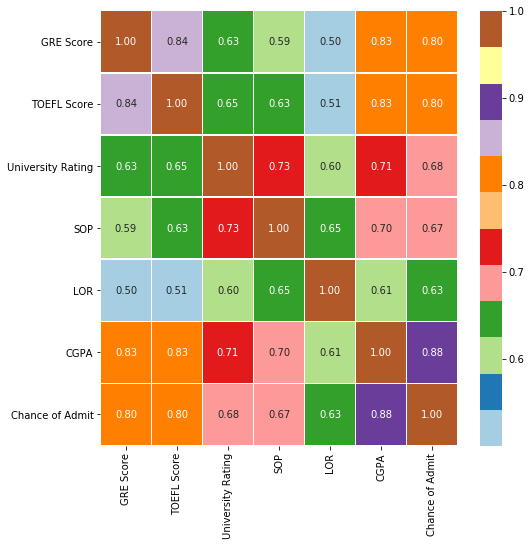

In [13]:
#annot: If True, write the data value in each cell
#fmt: format --> ".2f"= 2 decimal places
#linewidths: Width of the lines that will divide each cell.
#cmap: color map

plt.figure(figsize=(8, 8))
sns.heatmap(data=df_cor.corr(),annot=True, fmt=".2f", linewidths=.5, cmap="Paired")
plt.plot()

#### 데이터 시각화

[]

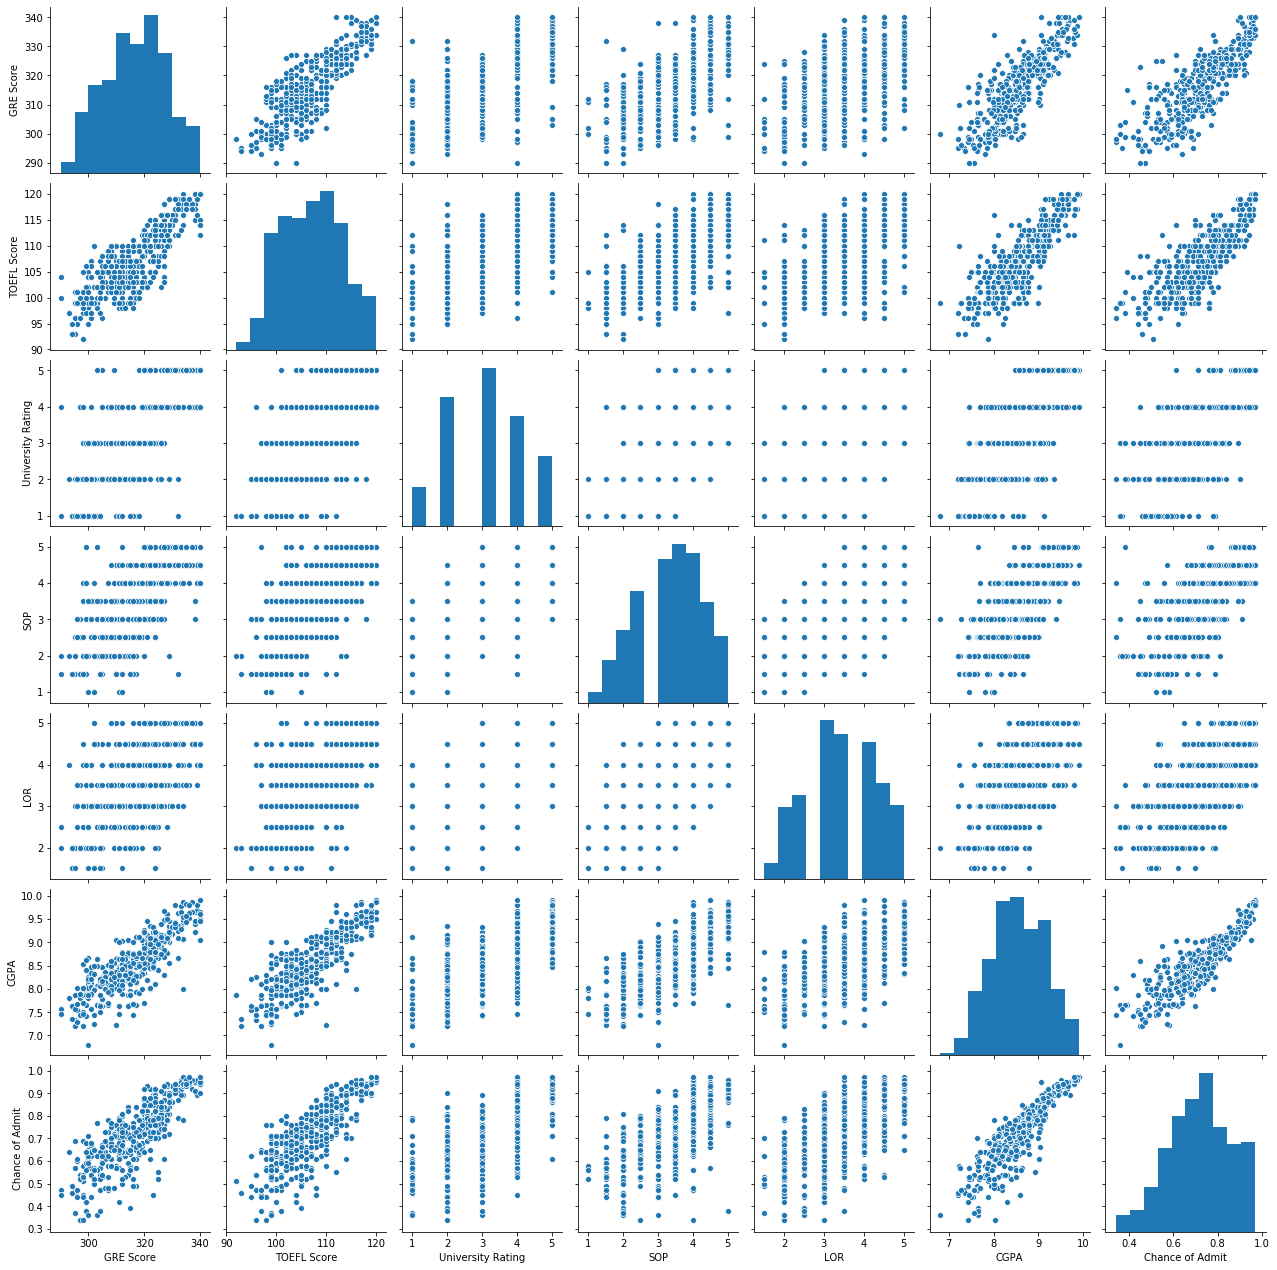

In [17]:
# 그냥 해보기
sns.pairplot(data=df_cor)
plt.plot()

[]

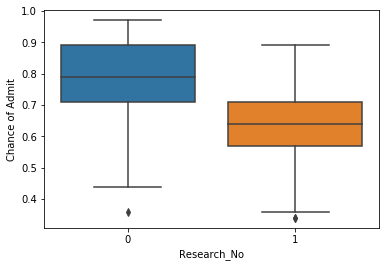

In [20]:
sns.boxplot(data=df, x="Research_No", y="Chance of Admit")
plt.plot()

# 3. 선형(Linear) 회귀

In [14]:
# seperate data - 설명변수와 종속변수

x = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [15]:
# seperate data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [16]:
# 데이터 각각 크기 확인
print("training predictors size:", x_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", x_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO

# 2. 모델을 적합시킵니다.
## TODO

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO

#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [ ]:
## TODO

Q. 절편 계수의 의미는 무엇인가요?  
A. 

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [ ]:
## TODO

Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

In [ ]:
## TODO

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

In [ ]:
## TODO

### 3.2. StatsModels로 선형 회귀 시행하기

In [17]:
import statsmodels.api as sm

In [18]:
## TODO 3
model = sm.OLS(y_train, x_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          1.99e-114
Time:                        18:05:04   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. 좋은 모델이라고 볼 수 있습니다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. university rating은 p값이 0.561로 매우 높습니다. 따라서, university rating은 대학원 합격률을 설명하는 유의한 변수라고 볼 수 없습니다. 

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

### no cross-validation -ridge

In [22]:
from sklearn.linear_model import Ridge

In [122]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
ridge = Ridge(alpha=0.9)

# 2. 모델을 적합시킵니다.
## TODO
ridge_fit =ridge.fit(x_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.5f" % ridge.score(x_train, y_train))

Training R^2: 0.82593


In [45]:
# 모델의 intercept와 slope 확인
print("intercept:", ridge.intercept_)
beta= pd.DataFrame(ridge.coef_, index=x_train.columns, columns=["slope"])
beta.sort_values("slope")

intercept: -1.249641793070055


,slope
Research_No,-0.013145
GRE Score,0.001724
University Rating,0.002987
TOEFL Score,0.003713
SOP,0.007558
Research_Yes,0.013145
LOR,0.017657
CGPA,0.108224


### cross validtion - ridge

In [125]:
ridgecv_alpha_list = list(np.arange(0.01, 10.0, 0.005))

print(ridgecv_alpha_list[:5])

[0.01, 0.015, 0.019999999999999997, 0.024999999999999998, 0.03]


In [120]:
from sklearn.linear_model import RidgeCV

#1. 모델 만들기
ridge_cv= RidgeCV(alphas=ridgecv_alpha_list)

# 2. 모델 적합
ridge_cv.fit(x_train, y_train)

# 3. 성능 확인
print("Training R^2: %.5f" % ridge_cv.score(x_train, y_train))

Training R^2: 0.82596


In [118]:
ridge_cv.alpha_

0.5999999999999999

### no cross validation - lasso

In [133]:
from sklearn.linear_model import Lasso

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso = Lasso(alpha=0.3)

# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(x_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.5f" % lasso.score(x_train, y_train))

Training R^2: 0.62523


In [71]:
print("intercept:", lasso.intercept_)
beta = pd.DataFrame( lasso.coef_, index= x_train.columns, columns=['slope'])
beta.sort_values("slope")

intercept: -1.7695414632545716


,slope
TOEFL Score,0.000000
University Rating,0.000000
SOP,0.000000
LOR,0.000000
CGPA,0.000000
Research_No,-0.000000
Research_Yes,0.000000
GRE Score,0.007861


### cross validatioin - lasso

In [134]:
from sklearn.linear_model import LassoCV

# 1. create a model
lasso_cv = LassoCV(n_alphas=100, alphas=None )

# 2. fit 
lasso_cv.fit(x_train, y_train)

# 3. check score
print("Training R^2: %.5f" % lasso.score(x_train, y_train))

Training R^2: 0.62523


In [130]:
lasso_cv.alpha_

0.0013153574218750007

### 학습된 모델로 test data 예측

In [135]:
pred= ridge_cv.predict(x_test)
submission= pd.DataFrame(pred, columns=['ridgecv'])
submission.head()

,ridgecv
0,0.731921
1,0.673926
2,0.799904
3,0.853705
4,0.596962


In [136]:
submission.to_csv('graduate_submission.csv', index=False)